In [1]:
%matplotlib notebook

import os
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
from scipy.stats import sem
from scipy.stats import linregress
import scipy.stats as st

In [2]:
# ESTABLISH PATHS

# Probability (%) of dying between age 30 and exact age 70 from cardiovascular disease, cancer, diabetes, or chronic respiratory disease
cancer_etc_path = "./data/good_data/30-70cancerChdEtc.csv"
# could also analyze healthy life expectancy at birth (?) instead of cancer etc.
hale_birth_path = "./data/good_data/HALElifeExpectancyAtBirth.csv"

# Alcohol per capita (15+)
alcohol_path = "./data/good_data/alcoholSubstanceAbuse.csv"

# Medical doctors (per 10,000 people)
doctors_path = "./data/good_data/medicalDoctors.csv"

# Age-standardized prevalence of current tobacco smoking among persons aged 15 years and older
tobacco_path = "./data/good_data/tobaccoAge15.csv"

In [3]:
# CONVERT TO DATA FRAMES

# Healthy life expectancy (HALE) at birth
hale_birth_df = pd.read_csv(hale_birth_path, encoding = "utf-8")

# Probability (%) of dying between 30 and 70 of cancer, cardiovascular disease, diabetes or chronic respiratory disease
cancer_etc_df = pd.read_csv(cancer_etc_path, encoding = "utf-8")

# Alcohol per capita (15+)
alcohol_df = pd.read_csv(alcohol_path, encoding = "utf-8")

# Age-standardized prevalence of current tobacco smoking among persons aged 15 years and older (%)
tobacco_df = pd.read_csv(tobacco_path, encoding = "utf-8")

hale_birth_df.head()


,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Healthy life expectancy (HALE) at birth (years),Both sexes,53.95
1,Afghanistan,2019,Healthy life expectancy (HALE) at birth (years),Male,54.73
2,Afghanistan,2019,Healthy life expectancy (HALE) at birth (years),Female,53.15
3,Afghanistan,2015,Healthy life expectancy (HALE) at birth (years),Both sexes,52.60
4,Afghanistan,2015,Healthy life expectancy (HALE) at birth (years),Male,52.78


In [4]:
# Cancer vs. Tobacco

cancer_etc_df = cancer_etc_df.set_index(["Period"])
tobacco_df = tobacco_df.set_index(["Period"])

cancer_tobacco_df = pd.merge(cancer_etc_df, tobacco_df, on = ["Location", "Period", "Dim1"], how = "inner")
cancer_tobacco_df


cancer_tobacco_df = cancer_tobacco_df.rename(columns = {
    'First Tooltip_x': 'Probability of Dying (%)',
    'First Tooltip_y': 'Tobacco Use (%)',
    'Dim1': 'Gender'
})
cancer_tobacco_df.head()


,Location,Indicator_x,Gender,Probability of Dying (%),Indicator_y,Tobacco Use (%)
Period,,,,,,
2016,Albania,Probability (%) of dying between age 30 and ex...,Both sexes,17.0,Age-standardized prevalence of current tobacco...,29.7
2016,Albania,Probability (%) of dying between age 30 and ex...,Male,20.7,Age-standardized prevalence of current tobacco...,51.1
2016,Albania,Probability (%) of dying between age 30 and ex...,Female,13.1,Age-standardized prevalence of current tobacco...,8.2
2015,Albania,Probability (%) of dying between age 30 and ex...,Both sexes,17.4,Age-standardized prevalence of current tobacco...,29.9
2015,Albania,Probability (%) of dying between age 30 and ex...,Male,20.9,Age-standardized prevalence of current tobacco...,51.4


In [5]:
# Cancer vs. Tobacco

cancer_tobacco_df = pd.merge(cancer_etc_df, tobacco_df, on = ["Location", "Period", "Dim1"], how = "inner")
cancer_tobacco_df

cancer_tobacco_df = cancer_tobacco_df.rename(columns = {
    'First Tooltip_x': 'Probability of Dying (%)',
    'First Tooltip_y': 'Tobacco Use (%)',
    'Dim1': 'Gender'
})
cancer_tobacco_df

cancer_tobacco_df = cancer_tobacco_df.drop(columns = ["Indicator_x", "Indicator_y"])
both_sexes = cancer_tobacco_df["Gender"] == "Both sexes"
both_sexes

male_female_df = cancer_tobacco_df[cancer_tobacco_df.Gender != 'Both sexes']
male_female_df.head()

,Location,Gender,Probability of Dying (%),Tobacco Use (%)
Period,,,,
2016,Albania,Male,20.7,51.1
2016,Albania,Female,13.1,8.2
2015,Albania,Male,20.9,51.4
2015,Albania,Female,13.7,8.3
2010,Albania,Male,22.3,53.2


In [6]:
# Number of rows
male_female_df["Gender"].value_counts()


Female    720
Male      720
Name: Gender, dtype: int64

In [7]:
# Sorting by highest use (%)
male_female_df.sort_values(by=['Tobacco Use (%)'], inplace=True, ascending=False)
male_female_df.head()

<ipython-input-7-6155b6c0aa33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_female_df.sort_values(by=['Tobacco Use (%)'], inplace=True, ascending=False)


,Location,Gender,Probability of Dying (%),Tobacco Use (%)
Period,,,,
2000,Timor-Leste,Male,28.2,91.0
2005,Timor-Leste,Male,25.6,85.7
2000,Lao People's Democratic Republic,Male,29.8,84.0
2000,Myanmar,Male,26.1,83.0
2000,Kiribati,Male,35.1,81.7


In [8]:
cancer_tobacco2000_df = male_female_df[male_female_df.index == 2000]
cancer_tobacco2000_df.head()

,Location,Gender,Probability of Dying (%),Tobacco Use (%)
Period,,,,
2000,Timor-Leste,Male,28.2,91.0
2000,Lao People's Democratic Republic,Male,29.8,84.0
2000,Myanmar,Male,26.1,83.0
2000,Kiribati,Male,35.1,81.7
2000,Nepal,Male,30.7,73.9


In [9]:
# Scatterplot for 2000: Tobacco Use vs Probability of Death

x_values = cancer_tobacco2000_df["Tobacco Use (%)"]
y_values = cancer_tobacco2000_df["Probability of Dying (%)"]
title = "Tobacco Use & Probability of Death by Disease (2000)"
x_label = "Tobacco Use (%)"
y_label = "Probability of Dying (%)"

# def plot_linear_regression(x_values, y_values, title, x_label, y_label):
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker = "o", alpha = 0.5, linewidth = 1, edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (60,8), fontsize = 12, color = "red")
plt.grid(True)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.savefig('both_sexes_tobacco2000.png')

plt.show()

# def correlation(x_values, y_values):
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient is {round(correlation[0],2)}.")
    

<IPython.core.display.Javascript object>

The correlation coefficient is 0.39.


In [10]:
cancer_tobacco2005_df = male_female_df[male_female_df.index == 2005]
cancer_tobacco2005_df.head()

,Location,Gender,Probability of Dying (%),Tobacco Use (%)
Period,,,,
2005,Timor-Leste,Male,25.6,85.7
2005,Myanmar,Male,27.8,79.7
2005,Lao People's Democratic Republic,Male,30.1,78.3
2005,Kiribati,Male,35.0,77.8
2005,Indonesia,Male,30.4,67.7


<IPython.core.display.Javascript object>


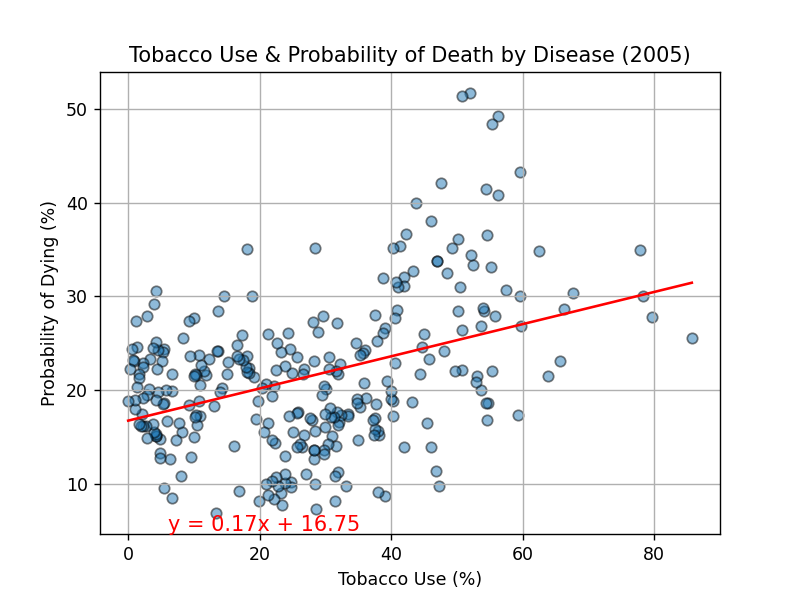

The correlation coefficient is 0.39.


In [11]:
x_values = cancer_tobacco2005_df["Tobacco Use (%)"]
y_values = cancer_tobacco2005_df["Probability of Dying (%)"]
title = "Tobacco Use & Probability of Death by Disease (2005)"
x_label = "Tobacco Use (%)"
y_label = "Probability of Dying (%)"

# def plot_linear_regression(x_values, y_values, title, x_label, y_label):
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker = "o", alpha = 0.5, linewidth = 1, edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,5), fontsize = 12, color = "red")
plt.grid(True)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.savefig('both_sexes_tobacco2005.png')

plt.show()

# def correlation(x_values, y_values):
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient is {round(correlation[0],2)}.")
    

In [12]:
cancer_tobacco2010_df = male_female_df[male_female_df.index == 2010]
cancer_tobacco2010_df.head()

,Location,Gender,Probability of Dying (%),Tobacco Use (%)
Period,,,,
2010,Timor-Leste,Male,24.9,78.0
2010,Myanmar,Male,27.7,76.1
2010,Kiribati,Male,34.6,73.7
2010,Lao People's Democratic Republic,Male,29.7,71.0
2010,Indonesia,Male,30.7,68.7


In [13]:
# graph prevalence of tobacco vs. 30-70 cancer, etc deaths

x_values = cancer_tobacco2010_df["Tobacco Use (%)"]
y_values = cancer_tobacco2010_df["Probability of Dying (%)"]
title = "Tobacco Use & Probability of Death by Disease (2010)"
x_label = "Tobacco Use (%)"
y_label = "Probability of Dying (%)"

# def plot_linear_regression(x_values, y_values, title, x_label, y_label):
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker = "o", alpha = 0.5, linewidth = 1, edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,5), fontsize = 12, color = "red")
plt.grid(True)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.savefig('both_sexes_tobacco2010.png')

plt.show()

# def correlation(x_values, y_values):
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient is {round(correlation[0],2)}.")
    


<IPython.core.display.Javascript object>

The correlation coefficient is 0.4.


In [14]:
# Cancer vs. Tobacco 2010 (M)

cancer_tobacco2010m_df = cancer_tobacco2010_df[cancer_tobacco2010_df.Gender == 'Male']

cancer_tobacco2010m_df.head()

,Location,Gender,Probability of Dying (%),Tobacco Use (%)
Period,,,,
2010,Timor-Leste,Male,24.9,78.0
2010,Myanmar,Male,27.7,76.1
2010,Kiribati,Male,34.6,73.7
2010,Lao People's Democratic Republic,Male,29.7,71.0
2010,Indonesia,Male,30.7,68.7


<IPython.core.display.Javascript object>


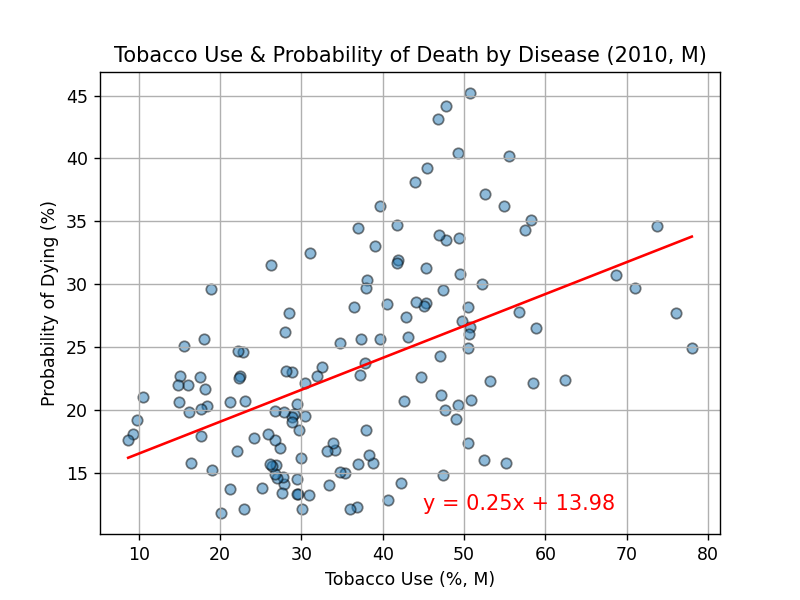

The correlation coefficient is 0.48.


In [15]:
# Cancer vs Tobacco 2010 (M) Scatterplot & Linear Regression, Correlation

x_values = cancer_tobacco2010m_df["Tobacco Use (%)"]
y_values = cancer_tobacco2010m_df["Probability of Dying (%)"]
title = "Tobacco Use & Probability of Death by Disease (2010, M)"
x_label = "Tobacco Use (%, M)"
y_label = "Probability of Dying (%)"

# def plot_linear_regression(x_values, y_values, title, x_label, y_label):
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker = "o", alpha = 0.5, linewidth = 1, edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
#plt.plot(line_eq)
plt.annotate(line_eq, (45,12), fontsize = 12, color = "red")
plt.grid(True)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.savefig('male_tobacco2010.png')

plt.show()

# def correlation(x_values, y_values):
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient is {round(correlation[0],2)}.")

In [16]:
# Cancer vs. Tobacco 2010 (F)

cancer_tobacco2010f_df = cancer_tobacco2010_df[cancer_tobacco2010_df.Gender == 'Female']

cancer_tobacco2010f_df.head()

,Location,Gender,Probability of Dying (%),Tobacco Use (%)
Period,,,,
2010,Chile,Female,10.9,44.1
2010,Kiribati,Female,23.6,42.5
2010,Serbia,Female,16.8,40.4
2010,Sweden,Female,8.7,39.1
2010,Bulgaria,Female,16.8,36.8


<IPython.core.display.Javascript object>


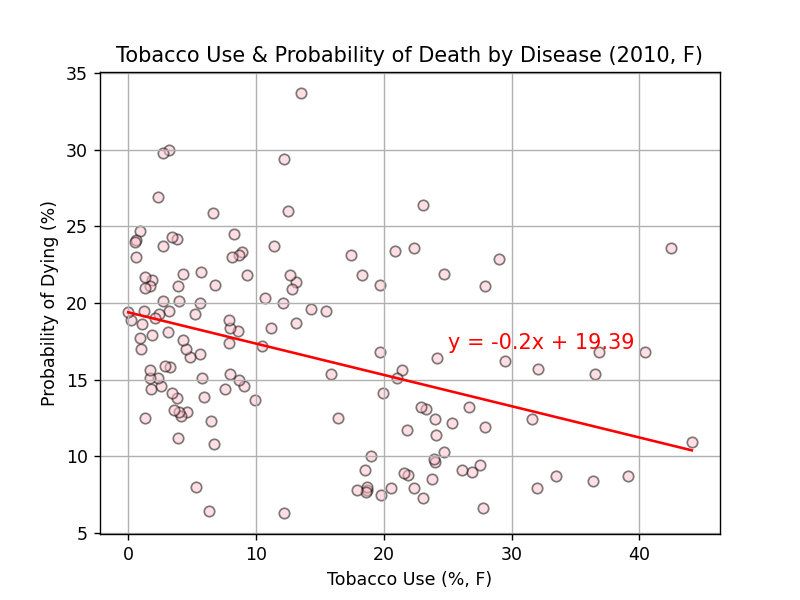

The correlation coefficient is -0.38.


In [17]:
# Cancer vs Tobacco 2010 (F) Scatterplot & Linear Regression, Correlation

x_values = cancer_tobacco2010f_df["Tobacco Use (%)"]
y_values = cancer_tobacco2010f_df["Probability of Dying (%)"]
title = "Tobacco Use & Probability of Death by Disease (2010, F)"
x_label = "Tobacco Use (%, F)"
y_label = "Probability of Dying (%)"

# def plot_linear_regression(x_values, y_values, title, x_label, y_label):
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker = "o", alpha = 0.5, linewidth = 1, edgecolor = "black", color = "pink")
plt.plot(x_values, regress_values, "r-")
#plt.plot(line_eq)
plt.annotate(line_eq, (25,17), fontsize = 12, color = "red")
plt.grid(True)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.savefig('female_tobacco2010.png')

plt.show()

# def correlation(x_values, y_values):
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient is {round(correlation[0],2)}.")

In [18]:
cancer_tobacco2015_df = male_female_df[male_female_df.index == 2015]
cancer_tobacco2015_df.head()

,Location,Gender,Probability of Dying (%),Tobacco Use (%)
Period,,,,
2015,Myanmar,Male,27.3,72.1
2015,Kiribati,Male,34.5,70.4
2015,Timor-Leste,Male,21.7,70.2
2015,Indonesia,Male,30.3,70.0
2015,Lao People's Democratic Republic,Male,29.2,63.8


<IPython.core.display.Javascript object>


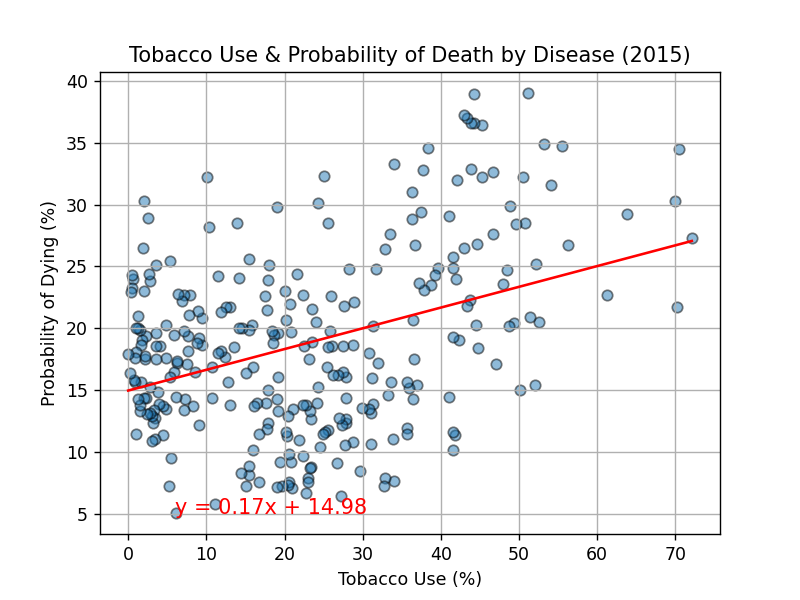

The correlation coefficient is 0.38.


In [19]:
x_values = cancer_tobacco2015_df["Tobacco Use (%)"]
y_values = cancer_tobacco2015_df["Probability of Dying (%)"]
title = "Tobacco Use & Probability of Death by Disease (2015)"
x_label = "Tobacco Use (%)"
y_label = "Probability of Dying (%)"

# def plot_linear_regression(x_values, y_values, title, x_label, y_label):
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker = "o", alpha = 0.5, linewidth = 1, edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,5), fontsize = 12, color = "red")
plt.grid(True)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.savefig('both_sexes_tobacco2015.png')

plt.show()

# def correlation(x_values, y_values):
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient is {round(correlation[0],2)}.")

In [20]:
# Cancer vs. Alcohol
alcohol_df = alcohol_df.set_index(['Period'])

cancer_alcohol_df = pd.merge(cancer_etc_df, alcohol_df, on = ["Location", "Period", "Dim1"], how = "inner")
cancer_alcohol_df

cancer_alcohol_df = cancer_alcohol_df.rename(columns = {
    'First Tooltip_x': 'Probability of Dying (%)',
    'First Tooltip_y': 'Alcohol per Capita',
    'Dim1': 'Gender'
})
cancer_alcohol_df

cancer_alcohol_df = cancer_alcohol_df.drop(columns = ["Indicator_x", "Indicator_y"])
both_sexes_alcohol = cancer_alcohol_df["Gender"] == "Both sexes"
both_sexes_alcohol

male_female_alcohol_df = cancer_alcohol_df[cancer_alcohol_df.Gender != 'Both sexes']
male_female_alcohol_df

,Location,Gender,Probability of Dying (%),Alcohol per Capita
Period,,,,
2015,Afghanistan,Male,31.9,0.350
2015,Afghanistan,Female,27.8,0.054
2010,Afghanistan,Male,34.1,0.360
2010,Afghanistan,Female,29.4,0.054
2015,Albania,Male,20.9,10.920
...,...,...,...,...
2010,Zimbabwe,Female,21.5,1.390
2005,Zimbabwe,Male,22.1,4.720
2005,Zimbabwe,Female,22.9,0.990


In [21]:
# sort by alcohol per capita
male_female_alcohol_df.sort_values(by=['Alcohol per Capita'], inplace=True, ascending=False)
male_female_alcohol_df.head()

<ipython-input-21-50890edaae1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_female_alcohol_df.sort_values(by=['Alcohol per Capita'], inplace=True, ascending=False)


,Location,Gender,Probability of Dying (%),Alcohol per Capita
Period,,,,
2005,Republic of Moldova,Male,40.0,30.74
2015,Seychelles,Male,28.8,28.57
2005,Russian Federation,Male,51.4,28.52
2010,Belarus,Male,45.2,27.68
2000,Romania,Male,34.3,27.13


In [22]:
# Alcohol 2000
cancer_alcohol2000_df = male_female_alcohol_df[male_female_alcohol_df.index == 2000]
cancer_alcohol2000_df.head()

,Location,Gender,Probability of Dying (%),Alcohol per Capita
Period,,,,
2000,Romania,Male,34.3,27.13
2000,Russian Federation,Male,50.5,26.20
2000,Belarus,Male,47.2,24.47
2000,Czechia,Male,30.5,23.23
2000,Ireland,Male,21.8,22.73


<IPython.core.display.Javascript object>


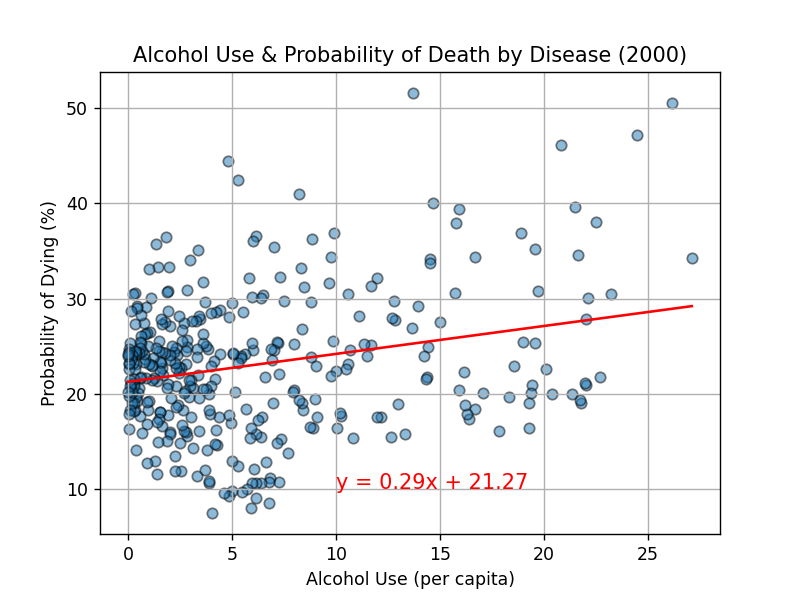

The correlation coefficient is 0.25.


In [23]:
x_values = cancer_alcohol2000_df["Alcohol per Capita"]
y_values = cancer_alcohol2000_df["Probability of Dying (%)"]
title = "Alcohol Use & Probability of Death by Disease (2000)"
x_label = "Alcohol Use (per capita)"
y_label = "Probability of Dying (%)"

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker = "o", alpha = 0.5, linewidth = 1, edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,10), fontsize = 12, color = "red")
plt.grid(True)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.savefig('both_sexes_alcohol2000.png')

plt.show()

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient is {round(correlation[0],2)}.")

In [24]:
# Alcohol 2005
cancer_alcohol2005_df = male_female_alcohol_df[male_female_alcohol_df.index == 2005]
cancer_alcohol2005_df.head()

,Location,Gender,Probability of Dying (%),Alcohol per Capita
Period,,,,
2005,Republic of Moldova,Male,40.0,30.74
2005,Russian Federation,Male,51.4,28.52
2005,Lithuania,Male,38.0,25.84
2005,Estonia,Male,35.2,25.31
2005,Romania,Male,33.8,24.66


<IPython.core.display.Javascript object>


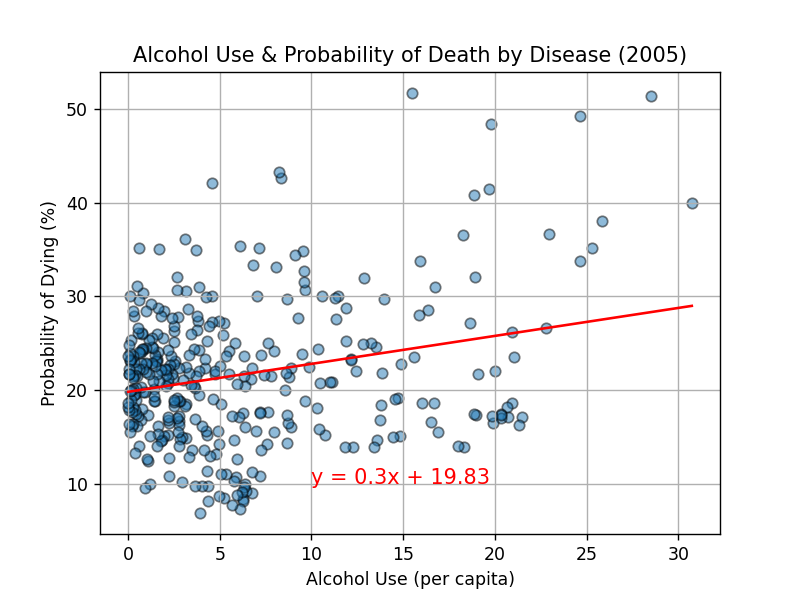

The correlation coefficient is 0.25.


In [25]:
x_values = cancer_alcohol2005_df["Alcohol per Capita"]
y_values = cancer_alcohol2005_df["Probability of Dying (%)"]
title = "Alcohol Use & Probability of Death by Disease (2005)"
x_label = "Alcohol Use (per capita)"
y_label = "Probability of Dying (%)"

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker = "o", alpha = 0.5, linewidth = 1, edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,10), fontsize = 12, color = "red")
plt.grid(True)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.savefig('both_sexes_alcohol2005.png')

plt.show()

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient is {round(correlation[0],2)}.")

In [26]:
# Cancer vs. Alcohol (2010) - Both sexes

cancer_alcohol2010_df = male_female_alcohol_df[male_female_alcohol_df.index == 2010]
cancer_alcohol2010_df.head()


,Location,Gender,Probability of Dying (%),Alcohol per Capita
Period,,,,
2010,Belarus,Male,45.2,27.68
2010,Russian Federation,Male,43.1,26.54
2010,Lithuania,Male,34.7,24.59
2010,Republic of Moldova,Male,38.1,24.36
2010,Montenegro,Male,28.1,23.92


In [27]:
x_values = cancer_alcohol2010_df["Alcohol per Capita"]
y_values = cancer_alcohol2010_df["Probability of Dying (%)"]
title = "Alcohol Use & Probability of Death by Disease (2010)"
x_label = "Alcohol Use (per capita)"
y_label = "Probability of Dying (%)"

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker = "o", alpha = 0.5, linewidth = 1, edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,5), fontsize = 12, color = "red")
plt.grid(True)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.savefig('both_sexes_alcohol2010.png')

plt.show()

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient is {round(correlation[0],2)}.")

<IPython.core.display.Javascript object>

The correlation coefficient is 0.22.


In [28]:
# Cancer vs. Alcohol 2010 (M)

cancer_alcohol2010m_df = cancer_alcohol2010_df[cancer_alcohol2010_df.Gender == 'Male']

cancer_alcohol2010m_df.head()

,Location,Gender,Probability of Dying (%),Alcohol per Capita
Period,,,,
2010,Belarus,Male,45.2,27.68
2010,Russian Federation,Male,43.1,26.54
2010,Lithuania,Male,34.7,24.59
2010,Republic of Moldova,Male,38.1,24.36
2010,Montenegro,Male,28.1,23.92


In [29]:
# Cancer vs Alcohol 2010 (M) Scatterplot & Linear Regression, Correlation

x_values = cancer_alcohol2010m_df["Alcohol per Capita"]
y_values = cancer_alcohol2010m_df["Probability of Dying (%)"]
title = "Alcohol Use & Probability of Death by Disease (2010, M)"
x_label = "Alcohol per Capita (M)"
y_label = "Probability of Dying (%)"

# def plot_linear_regression(x_values, y_values, title, x_label, y_label):
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker = "o", alpha = 0.5, linewidth = 1, edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
#plt.plot(line_eq)
plt.annotate(line_eq, (17,25), fontsize = 12, color = "red")
plt.grid(True)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.savefig('male_alcohol2010.png')

plt.show()

# def correlation(x_values, y_values):
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient is {round(correlation[0],2)}.")

<IPython.core.display.Javascript object>

The correlation coefficient is 0.06.


In [30]:
# Cancer vs. Alcohol 2010 (F)

cancer_alcohol2010f_df = cancer_alcohol2010_df[cancer_alcohol2010_df.Gender == 'Female']

cancer_alcohol2010f_df.head()

,Location,Gender,Probability of Dying (%),Alcohol per Capita
Period,,,,
2010,Belarus,Female,18.4,8.83
2010,Republic of Moldova,Female,22.0,7.57
2010,Lithuania,Female,14.1,7.56
2010,Russian Federation,Female,19.6,6.96
2010,Czechia,Female,11.9,6.86


<IPython.core.display.Javascript object>


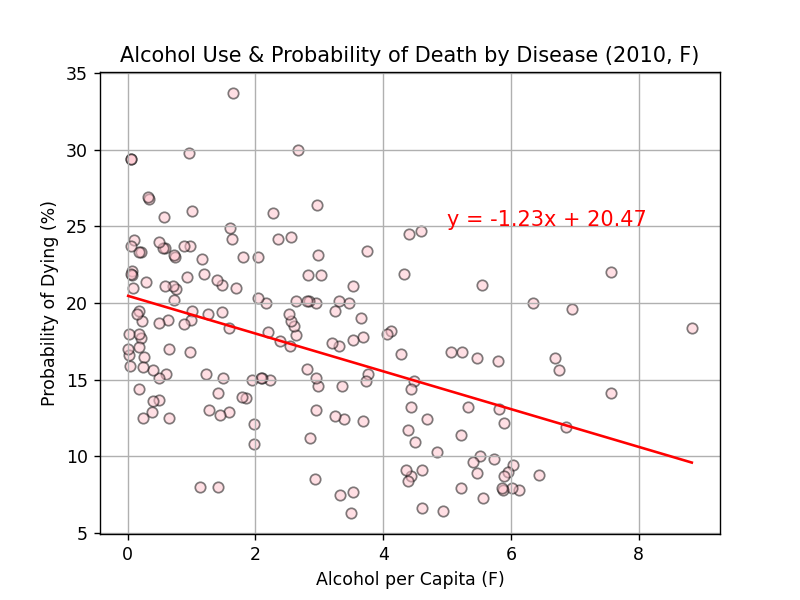

The correlation coefficient is -0.46.


In [31]:
# Cancer vs Alcohol 2010 (F) Scatterplot & Linear Regression, Correlation

x_values = cancer_alcohol2010f_df["Alcohol per Capita"]
y_values = cancer_alcohol2010f_df["Probability of Dying (%)"]
title = "Alcohol Use & Probability of Death by Disease (2010, F)"
x_label = "Alcohol per Capita (F)"
y_label = "Probability of Dying (%)"

# def plot_linear_regression(x_values, y_values, title, x_label, y_label):
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker = "o", alpha = 0.5, linewidth = 1, edgecolor = "black", color = "pink")
plt.plot(x_values, regress_values, "r-")
#plt.plot(line_eq)
plt.annotate(line_eq, (5,25), fontsize = 12, color = "red")
plt.grid(True)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.savefig('female_alcohol2010.png')

plt.show()

# def correlation(x_values, y_values):
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient is {round(correlation[0],2)}.")

In [32]:
# Alcohol 2015
cancer_alcohol2015_df = male_female_alcohol_df[male_female_alcohol_df.index == 2015]
cancer_alcohol2015_df.head()

,Location,Gender,Probability of Dying (%),Alcohol per Capita
Period,,,,
2015,Seychelles,Male,28.8,28.57
2015,Lithuania,Male,32.8,24.71
2015,Uganda,Male,23.9,24.70
2015,Czechia,Male,20.7,21.96
2015,Russian Federation,Male,37.2,21.28


In [33]:
x_values = cancer_alcohol2015_df["Alcohol per Capita"]
y_values = cancer_alcohol2015_df["Probability of Dying (%)"]
title = "Alcohol Use & Probability of Death by Disease (2015)"
x_label = "Alcohol Use (per capita)"
y_label = "Probability of Dying (%)"

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker = "o", alpha = 0.5, linewidth = 1, edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,7), fontsize = 12, color = "red")
plt.grid(True)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.savefig('both_sexes_alcohol2015.png')

plt.show()

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient is {round(correlation[0],2)}.")

<IPython.core.display.Javascript object>

The correlation coefficient is 0.17.


In [34]:
tobacco_both_sexes = cancer_tobacco_df[cancer_tobacco_df.Gender == 'Both sexes']
alcohol_both_sexes = cancer_alcohol_df[cancer_alcohol_df.Gender == 'Both sexes']

summary_df = pd.merge(tobacco_both_sexes, alcohol_both_sexes, on = ["Location", "Period"], how = "inner")
summary_df

summary_df = summary_df[["Location", "Gender_x", "Probability of Dying (%)_x", "Tobacco Use (%)", "Alcohol per Capita"]]
summary_df

summary_df = summary_df.rename(columns = {
    'Gender_x': 'Gender',
    'Probability of Dying (%)_x': 'Probability of Death (%)'
})
summary_df.head()

,Location,Gender,Probability of Death (%),Tobacco Use (%),Alcohol per Capita
Period,,,,,
2015,Albania,Both sexes,17.4,29.9,6.74
2010,Albania,Both sexes,18.6,31.1,7.69
2005,Albania,Both sexes,18.8,32.7,7.65
2000,Albania,Both sexes,19.4,34.2,6.57
2015,Algeria,Both sexes,14.4,19.3,0.93


In [35]:
summary_means_df = summary_df.groupby('Period').mean()
summary_means_df.head()

,Probability of Death (%),Tobacco Use (%),Alcohol per Capita
Period,,,
2000,22.774648,30.236620,6.469387
2005,21.383099,27.248592,6.523725
2010,19.858333,24.847917,6.503486
2015,18.688889,22.775000,6.492007


In [36]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt


fig = plt.figure()

host = HostAxes(fig, [0.10, 0.09, 0.60, 0.75])
par1 = ParasiteAxes(host, sharex=host)
par2 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)
host.parasites.append(par2)

host.axis["right"].set_visible(False)

par1.axis["right"].set_visible(True)
par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

par2.axis["right2"] = par2.new_fixed_axis(loc="right", offset=(60, 0))

fig.add_axes(host)

p1, = host.plot([2000, 2005, 2010, 2015], summary_means_df['Probability of Death (%)'], label="Probability of Death (%)")
p2, = par1.plot([2000, 2005, 2010, 2015], summary_means_df['Alcohol per Capita'], label="Alcohol per Capita")
p3, = par2.plot([2000, 2005, 2010, 2015], summary_means_df['Tobacco Use (%)'], label="Tobacco Use (%)")

host.set_xlim(2000, 2015)
host.set_ylim(0, 100)
par1.set_ylim(6.25, 6.75)
par2.set_ylim(0, 100)

host.set_xlabel("Year")
host.set_ylabel("Probability of Death (%)")
par1.set_ylabel("Alcohol Use per Capita")
par2.set_ylabel("Tobacco Use (%)")

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right2"].label.set_color(p3.get_color())

plt.savefig('yearwise_global.png')

plt.show()

<IPython.core.display.Javascript object>

In [37]:
# HALE (Healthy Life Expectancy at Birth) Data Frame

hale_birth_df


tobacco_birth_df = hale_birth_df.set_index(["Period"])

hale_cancer_df = pd.merge(cancer_etc_df, hale_birth_df, on = ["Location", "Period", "Dim1"], how = "inner")
hale_cancer_df


# tobacco_df

hale_cancer_df = hale_cancer_df.rename(columns = {
    'First Tooltip_x': 'Probability of Dying (%)',
    'First Tooltip_y': 'HALE (years)',
    'Dim1': 'Gender'
})
hale_cancer_df

hale_cancer_df = hale_cancer_df.drop(columns = ["Indicator_x", "Indicator_y", "Probability of Dying (%)"])
hale_cancer_df

hale_cancer_df = hale_cancer_df.set_index("Period")


hale_birth2015_df = hale_cancer_df[hale_cancer_df.Gender == 'Both sexes']

hale_birth2015_df.head()


,Location,Gender,HALE (years)
Period,,,
2015,Afghanistan,Both sexes,52.60
2010,Afghanistan,Both sexes,51.13
2000,Afghanistan,Both sexes,46.76
2015,Albania,Both sexes,69.03
2010,Albania,Both sexes,67.57


In [38]:
# Composite Data Frame of Probability of Death (%), Tobacco Use (%), Alcohol per Capita (l), HALE (years) for both sexes in 2015

tobacco_both_sexes = cancer_tobacco_df[cancer_tobacco_df.Gender == 'Both sexes']
alcohol_both_sexes = cancer_alcohol_df[cancer_alcohol_df.Gender == 'Both sexes']


hale_birth_df = hale_birth_df.rename(columns ={
    'Dim1':'Gender',
    'First Tooltip': 'HALE (years)'
})

hale_birth_df = hale_birth_df[["Location", "Period", "Gender", "HALE (years)"]]
hale_birth_df

summary_df = pd.merge(tobacco_both_sexes, alcohol_both_sexes, on = ["Location", "Period"], how = "inner")
summary_df

summary_df = summary_df[["Location", "Gender_x", "Probability of Dying (%)_x", "Tobacco Use (%)", "Alcohol per Capita"]]
summary_df

summary_df = summary_df.rename(columns = {
    'Gender_x': 'Gender',
    'Probability of Dying (%)_x': 'Probability of Death (%)'
})
summary_df

summary_with_hale_df = pd.merge(summary_df, hale_birth2015_df, on = ["Location", "Period"], how = "inner")
summary_with_hale_df

summary_with_hale_df = summary_with_hale_df.rename(columns = {
    'Gender_x': 'Gender'
})

summary_with_hale_df = summary_with_hale_df.drop(columns = ["Gender_y"])
summary_with_hale_df.head()



,Location,Gender,Probability of Death (%),Tobacco Use (%),Alcohol per Capita,HALE (years)
Period,,,,,,
2015,Albania,Both sexes,17.4,29.9,6.74,69.03
2010,Albania,Both sexes,18.6,31.1,7.69,67.57
2000,Albania,Both sexes,19.4,34.2,6.57,65.24
2015,Algeria,Both sexes,14.4,19.3,0.93,65.99
2010,Algeria,Both sexes,15.4,20.0,0.65,65.53


<IPython.core.display.Javascript object>


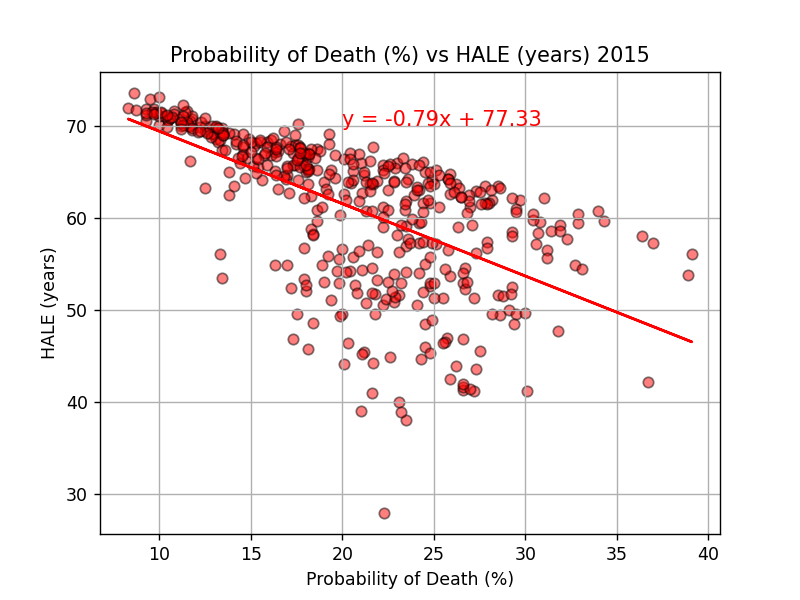

The correlation coefficient is -0.61.


In [39]:
x_values = summary_with_hale_df["Probability of Death (%)"]
y_values = summary_with_hale_df["HALE (years)"]

title = "Probability of Death (%) vs HALE (years) 2015"
x_label = "Probability of Death (%)"
y_label = "HALE (years)"

# def plot_linear_regression(x_values, y_values, title, x_label, y_label):
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker = "o", alpha = 0.5, linewidth = 1, edgecolor = "black", color = "red")
plt.plot(x_values, regress_values, "r-")
#plt.plot(line_eq)
plt.annotate(line_eq, (20,70), fontsize = 12, color = "red")
plt.grid(True)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.savefig('cancer_hale2015.png')

plt.show()

# def correlation(x_values, y_values):
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient is {round(correlation[0],2)}.")